In [25]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist datasetini yüklemek için gerekli...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Bu işlem 1-2 dk sürebilir..
mnist = fetch_openml('mnist_784')

In [26]:
mnist.data.shape


(70000, 784)

In [27]:
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

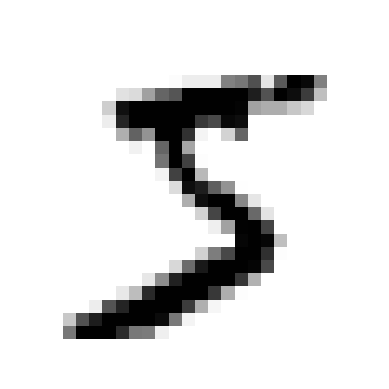

In [28]:
showimage(mnist.data, 0)

In [29]:
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [30]:
type(train_img)

pandas.core.frame.DataFrame

In [31]:
test_img_copy = test_img.copy()

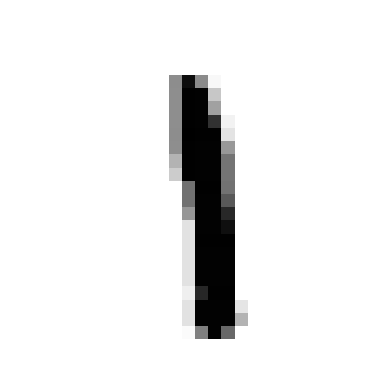

In [32]:
showimage(test_img_copy, 2)

In [33]:
scaler = StandardScaler()

scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [34]:
# Make an instance of the Model
pca = PCA(.95)

In [35]:
pca.fit(train_img)

PCA(n_components=0.95)

In [36]:
print(pca.n_components_)

327


In [37]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [38]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [39]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [40]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

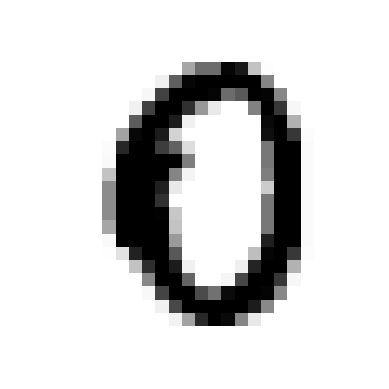

In [41]:
showimage(test_img_copy, 0)

In [42]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

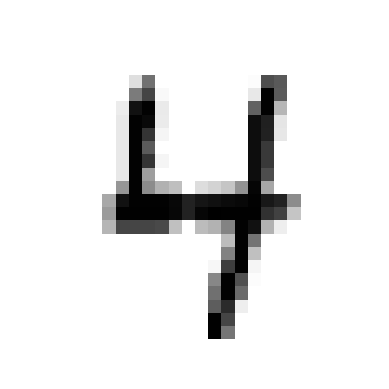

In [43]:
showimage(test_img_copy, 1)

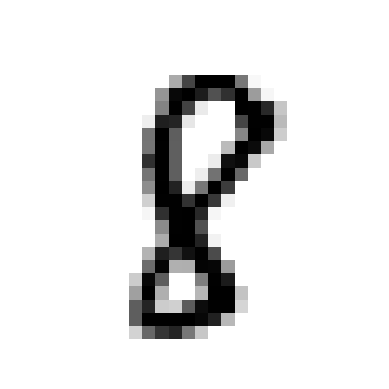

In [44]:
showimage(test_img_copy, 9900)

In [45]:
logisticRegr.predict(test_img[9900].reshape(1,-1))

array(['8'], dtype=object)

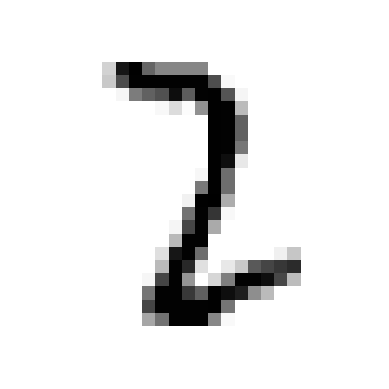

In [46]:
showimage(test_img_copy, 6789)

In [47]:
logisticRegr.predict(test_img[6789].reshape(1,-1))

array(['2'], dtype=object)

In [48]:
logisticRegr.score(test_img, test_lbl)

0.9184